In [89]:
import numpy as np
from matplotlib import pyplot as plt 
import pandas as pd
from matplotlib.pyplot import figure

In [125]:
def read_file(filename):
    photon_E, total_yield, yield_error = [],[],[]

    copy_lines=[]
    with open(filename) as f:
        lines = f.readlines()

    for line in lines:
        split_line = line.split()
        copy_lines.append(split_line)

    #from each line, extract a name/number and append it into its relevant column
    for i in range(1,len(copy_lines)-1): #2nd line in the file is the first relevant one
        line = copy_lines[i]

        photon_E.append(line[0]) #strip element name and type of commas
        total_yield.append(line[1])
        yield_error.append(line[2])

#extracted values are strings --> cast numbers to floats
    for i in range(0, len(photon_E)):
        photon_E[i] = float(photon_E[i])
        total_yield[i] = float(total_yield[i])
        yield_error[i] = float(yield_error[i])

    return([photon_E, total_yield, yield_error])

# GOLD

(4.444493841608585e-07, 1)

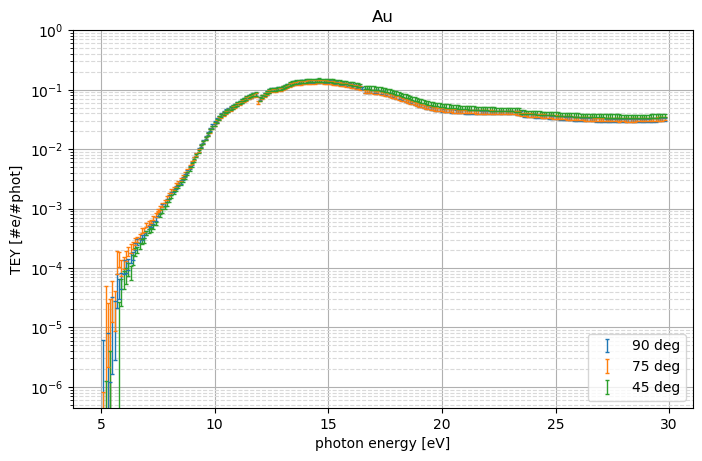

In [206]:
[Au_90_E, Au_90_TEY, Au_90_TEY_err] = read_file('TEY_files/Au_90deg.txt')
[Au_45_E, Au_45_TEY, Au_45_TEY_err] = read_file('TEY_files/Au_45deg.txt')
[Au_75_E, Au_75_TEY, Au_75_TEY_err] = read_file('TEY_files/Au_75deg.txt')

figure(figsize=(8, 5), dpi=100)

plt.errorbar(Au_90_E,Au_90_TEY, yerr=Au_90_TEY_err, linestyle='none', elinewidth=1, capsize=1.5, label='90 deg')
plt.errorbar(Au_75_E,Au_75_TEY, yerr = Au_75_TEY_err, linestyle='none', elinewidth=1, capsize=1.5, label='75 deg')
plt.errorbar(Au_45_E,Au_45_TEY, yerr=Au_45_TEY_err, linestyle='none', elinewidth=1, capsize=1.5, label='45 deg')
plt.xlabel('photon energy [eV]')
plt.ylabel('TEY [#e/#phot]')
plt.title('Au')
plt.grid(linestyle='--')
plt.legend(loc="lower right")
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.yscale('log')
plt.gca().set_ylim(top=1)

# ITO Radiator 1:

(2.5750125286425965e-07, 1)

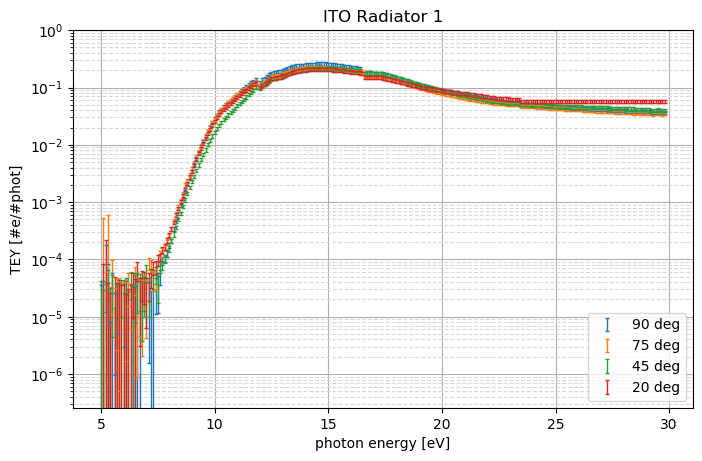

In [202]:
[ITO_Radiator_1_90_E, ITO_Radiator_1_90_TEY, ITO_Radiator_1_90_TEY_err] = read_file('TEY_files/ITO_Radiator_1_90deg.txt')
[ITO_Radiator_1_45_E, ITO_Radiator_1_45_TEY, ITO_Radiator_1_45_TEY_err] = read_file('TEY_files/ITO_Radiator_1_45deg.txt')
[ITO_Radiator_1_75_E, ITO_Radiator_1_75_TEY, ITO_Radiator_1_75_TEY_err] = read_file('TEY_files/ITO_Radiator_1_75deg.txt')
[ITO_Radiator_1_20_E, ITO_Radiator_1_20_TEY, ITO_Radiator_1_20_TEY_err] = read_file('TEY_files/ITO_Radiator_1_20deg.txt')

figure(figsize=(8, 5), dpi=100)

plt.errorbar(ITO_Radiator_1_90_E,ITO_Radiator_1_90_TEY, yerr=ITO_Radiator_1_90_TEY_err, linestyle='none', elinewidth=1, capsize=1.5, label='90 deg')
plt.errorbar(ITO_Radiator_1_75_E,ITO_Radiator_1_75_TEY, yerr = ITO_Radiator_1_75_TEY_err, linestyle='none', elinewidth=1, capsize=1.5, label='75 deg')
plt.errorbar(ITO_Radiator_1_45_E,ITO_Radiator_1_45_TEY, yerr=ITO_Radiator_1_45_TEY_err, linestyle='none', elinewidth=1, capsize=1.5, label='45 deg')
plt.errorbar(ITO_Radiator_1_20_E,ITO_Radiator_1_20_TEY, yerr=ITO_Radiator_1_20_TEY_err, linestyle='none', elinewidth=1, capsize=1.5, label='20 deg')
plt.xlabel('photon energy [eV]')
plt.ylabel('TEY [#e/#phot]')
plt.title('ITO Radiator 1')
plt.grid(linestyle='--')
plt.legend(loc="lower right")
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.yscale('log')
plt.gca().set_ylim(top=1)